# TP Final - Análisis de Datos (CEIA - FIUBA)

**Integrantes:**
- Araujo Arellano, Diego José
- Arias Suárez, Federico
- Martino, Emiliano Uriel
- Perez Omodeo, Carolina

In [1]:
# ---------------- Paquetes a utilizar ----------------

# Manipulación de datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualización
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium # Para dibujar mapas
from folium import plugins
from IPython.display import display, HTML
import warnings

pd.options.mode.chained_assignment = None

In [2]:
# ---------------- Carga de datos ----------------

df = pd.read_csv("listings_full.csv", low_memory=False)

# Se guardan los datos originales para poder acceder a ellos y trabajamos sobre el df
datos_originales = df.copy()

In [3]:
# ---------------- Separación de los datos en Train y Test ---------------- 
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
#df_train.shape

## 1. Introducción y Motivación

En los últimos años, la popularidad de las plataformas de alojamiento temporal, como Airbnb, ha experimentado un notable crecimiento a nivel global. Buenos Aires, como una de las ciudades más visitadas de América Latina, no es la excepción. La variabilidad de los precios de los alojamientos en diferentes barrios de la ciudad despierta el interés tanto de los anfitriones, que buscan maximizar sus ingresos, como de los huéspedes, que desean obtener la mejor relación calidad-precio.

El presente análisis de datos tiene como objetivo comprender los factores que influyen en los precios de los alojamientos en Airbnb en la ciudad de Buenos Aires. Mediante la recopilación y el análisis de datos detallados sobre los precios, se pretende identificar patrones y tendencias que puedan ser útiles para distintos stakeholders. Por ejemplo, los propietarios de alojamientos puedran optimizar sus precios, mientras que los viajeros tomar mejores decisiones a la hora de buscar su alojamiento.

Una motivación clave detrás de este análisis es la creación de un modelo predictivo. Para ello, se utilizaron los atributos específicos de los alojamientos, tales como la ubicación, el tamaño, la cantidad de habitaciones, baños, comodidades ofrecidas, etc. Con esto, se buscó entrenar un modelo de machine learning capaz de predecir el precio de un alojamiento en función de estos factores antes mencionados. Este modelo no solo permitirá prever los precios con mayor precisión, sino que también podrá ser una herramienta valiosa para el análisis comparativo y la toma de decisiones estratégicas.

Además, una parte fundamental de este estudio es la visualización geográfica de los precios. Utilizando la librería Folium de Python, se desarrollará un mapa interactivo que mostrará la distribución de los precios de los alojamientos por barrios en Buenos Aires. Esta visualización permitirá identificar fácilmente áreas con precios más altos o más bajos, facilitando así una comprensión espacial de las dinámicas del mercado de Airbnb en la ciudad.

## 2. Análisis exploratorio inicial

#### 2.1 Visualizar las primeras filas.

In [4]:
# ---------------- Visualización de las primeras filas ---------------- 

pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_train.head(5,)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5078,29306500,https://www.airbnb.com/rooms/29306500,20240428134723,2024-04-29,city scrape,LOFT en el corazón de San Telmo,"Loft-type apartment, super bright and quiet in...",San Telmo es uno de los barrios mas lindos de ...,https://a0.muscache.com/pictures/d7af2981-1fac...,84730718,https://www.airbnb.com/users/show/84730718,Eugenia,2016-07-19,"Buenos Aires, Argentina",NaN,within a few hours,100%,69%,f,https://a0.muscache.com/im/pictures/user/aab2c...,https://a0.muscache.com/im/pictures/user/aab2c...,San Telmo,3,3,"['email', 'phone', 'work_email']",t,t,"San Telmo, Buenos Aires, Argentina",San Telmo,NaN,-34.616400,-58.374260,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Mountain view"", ""Pets allowed"", ""Crib"", ""Iro...","$34,969.00",2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,24,49,79,354,2024-04-29,42,6,1,2018-11-04,2024-03-31,4.64,4.74,4.64,4.86,4.76,4.86,4.60,NaN,f,1,1,0,0,0.63
31022,1060921795549542546,https://www.airbnb.com/rooms/1060921795549542546,20240428134723,2024-04-29,city scrape,18) Departamento en Palermo,Discover comfort and style in our beautiful si...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,235600073,https://www.airbnb.com/users/show/235600073,Marcos,2019-01-10,"Buenos Aires, Argentina",NaN,within an hour,100%,80%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Barrio Norte,39,39,"['email', 'phone']",t,t,NaN,Villa Crespo,NaN,-34.600890,-58.431750,Entire rental unit,Entire home/apt,2,0.0,0 baths,0.0,0.0,"[""Kitchen"", ""Pool"", ""Air conditioning"", ""Dedic...","$19,233.00",30,365,30,30,365,365,30.0,365.0,NaN,t,30,60,90,269,2024-04-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,19,19,0,0,NaN
266,489848,https://www.airbnb.com/rooms/489848,20240428134723,2024-04-28,city scrape,Great Garden in 1890 Charming Art House.,"Enjoy, enjoy!! in a wonderful home, the house ...",An authentic porteño neighborhood! lots of col...,https://a0.muscache.com/pictures/0c887b6a-e748...,2422234,https://www.airbnb.com/users/show/2422234,Angela Lucia Maria,2012-05-20,"Buenos Aires, Argentina",Pinto y dibujo El premio más importante es *Pr...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/31893...,https://a0.muscache.com/im/pictures/user/31893...,Constitución,1,2,"['email', 'phone']",t,t,"Buenos Aires, Autonomous City of Buenos Aires,...",Constitucion,NaN,-34.620058,-58.382854,Entire villa,Entire home/apt,12,6.0,6 baths,6.0,8.0,"[""Board games"", ""Outdoor shower"", ""Hair dryer""...","$1,443,231.00",3,1125,1,3,1125,1125,3.0,1125.0,NaN,t,20,41,71,139,2024-04-28,197,25,2,2012-12-28,2024-04-08,4.90,4.93,4.93,4.97,4.95,4.28,4.84,NaN,t,1,1,

#### 2.2 Realizar un resumen de 5 números

In [5]:
# 'price' parece ser un objeto, por lo que habría que convertir en float
df_train['price'] = df_train['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype('float')


#host_is_super_host hay que cambiarla a bool:
df_train['host_is_superhost'] = df_train['host_is_superhost'].apply(lambda x: True if x == 't' else False )

In [6]:
# ---------------- Resumen de algunos números ---------------- 

df_train.loc[:,['bedrooms','beds','bathrooms','review_scores_value','price']].describe()

,bedrooms,beds,bathrooms,review_scores_value,price
count,32396.000000,30516.000000,30525.000000,26708.000000,3.053300e+04
mean,1.178633,1.679807,1.234840,4.746287,5.981793e+04
std,0.903480,1.601801,0.635548,0.362948,7.126960e+05
min,0.000000,0.000000,0.000000,1.000000,2.600000e+02
25%,1.000000,1.000000,1.000000,4.670000,2.273000e+04
50%,1.000000,1.000000,1.000000,4.840000,3.059800e+04
75%,1.000000,2.000000,1.000000,5.000000,4.371200e+04
max,35.000000,36.000000,22.000000,5.000000,4.371150e+07


Se pueden observar algunas cosas:
- La mayoría de los alojamientos poseen 1 cuarto tanto en media, como en mediana y su concentración alrededor de la misma (IRQ).
- Los baños siguen la misma lógica que los cuartos, mencionado anteriormente.
- Algunas habitaciones (e.g. cuartos, baños) presentan valores "0". Esto puede ser por error de imputación en el armado de la publicación (viendo algunas de ellas, se evidencia que el campo no está nulo, sino que se le carga "0").
- Las evaluaciones por lo general son positivas (se puede evidenciar por valores en media / mediana / IRQ).
- Se presenta mucha variabilidad en cuanto a precios de los alojamientos, esto seguramente es debido a las distintas características, ubicación, tamaño, etc. de los mismos.



#### 2.3 Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

In [7]:
# ---------------- Tipos de datos ---------------- 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32904 entries, 5078 to 15795
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32904 non-null  int64  
 1   listing_url                                   32904 non-null  object 
 2   scrape_id                                     32904 non-null  int64  
 3   last_scraped                                  32904 non-null  object 
 4   source                                        32904 non-null  object 
 5   name                                          32904 non-null  object 
 6   description                                   32134 non-null  object 
 7   neighborhood_overview                         16751 non-null  object 
 8   picture_url                                   32904 non-null  object 
 9   host_id                                       32904 non-nu

El dataset contiene varios campos (unos 74 en total), donde predominan las variables numéricas (41 vars.) y en menor medida variables del tipo *object* (no necesariamente categóricas).

**Variables numéricas**

Se presentan variables numéricas, tanto en valores enteros (*"int64"*), como en representaciones de punto flotante de doble precisión (*"float64"*). Algunos ejemplos de esto: 
- ***int64:*** se utilizan por lo general para hacer conteos e.g. *minimum_nights, number_of_reviews*.
- ***float64:*** se utilizan cuando se necesita representar números con varios decimales, como puede en el caso de coordenadas, e.g. *latitude, longitude, review_scores_values*.

**Variables categóricas**

Algunas variables categóricas que se pueden encontrar dentro del dataset (como "object"), son: 
- **neighbourhood_cleansed:** que refiere al barrio donde está ubicado el alojamiento. Presenta unas 48 categorías, por lo quizás sería bueno poder agruparlos en *macro categorías* (regiones, municipios, otros) para simplificar el análisis.
- **property_type:** el tipo de propiedad (*casa, hotel, villa, etc.*). Presenta unas 78 categorías, por lo que de utilizarla sería interesante agruparlas y también presenta datos *sucios* (e.g. denominaciones en inglés y en español).
- **room_type:** que refiere a opciones en cuanto tipo de alojamiento (*'Entire home/apt', 'Private room', 'Hotel room', 'Shared room'*). 

**Otras variables tipo "object"**

Como se decía anteriormente, predomina el tipo de dato *object*, que, si bien se utiliza por lo general para cadenas de texto (*strings*), puede contener cualquier tipo de dato. Algunos datos que se presentan como object, pero que podrían referir a un tipo específico de dato son:

- **Fechas:** e.g. última actualización de los datos (*last_scraped*), última puntuación (*last_review*), desde cuando está el host en la plataforma (*'host_since'*).
- **Lógicos:** o booleanos (`True` o `False`), e.g. la etiqueta de si el host es *superhost* (*host_is_superhost*), si tiene disponibilidad (*has_availability*).
- **Listas:** e.g. listas que indican las facilidades (*amenities*), o las verificaciones del host (*host_verifications*).




#### 2.4 Identificar las variables de entrada y de salida del problema.

En nuestro caso vamos a predecir el precio de alquiler por noche, para ello vamos a usar algunas de las columnas. Todo esto en base a información que más se tiene en cuenta a la hora de buscar un alojamiento (e.g. ubicación, habitaciones, reviews, facilidades, etc.).

In [8]:
# Tabla en formato HTML
data = {
    "Variable": ["name", "host_name", "host_is_superhost", "neighbourhood_cleansed", "bathrooms", "bathrooms_text", "bedrooms", "beds", 
                 "number_of_reviews", "review_scores_rating", "latitude", "longitude", "property_type", "room_type", "availability_30", 
                 "availability_60", "availability_90", "amenities", "price"],
    "Tipo": ["object", "object", "object", "object", "float64", "object", "int64", "int64", "int64", "float64", "float64", "float64", 
             "object", "object", "int64", "int64", "int64", "object", "object"],
    "Descripción": [
        "Nombre de la publicación del alojamiento (descripción).",
        "Nombre del host.",
        "Si el anfitrión está en la categoría de super host.",
        "Barrio donde está ubicado el alojamiento.",
        "Cantidad de baños.",
        "Cantidad de baños en formato texto. Se agrega luego de un primer análisis exploratorio, más adelante se explica el porqué.",
        "Cantidad de cuartos del alojamiento.",
        "Cantidad de camas.",
        "Cantidad de reviews que recibió el alojamiento.",
        "Puntuación del alojamiento.",
        "Coordenada geográfica/Latitud.",
        "Coordenada geográfica/Longitud.",
        "Tiene 70 categorías, se podría agrupar en macrocategorías.",
        "Tipo de cuarto (privada / compartida).",
        "Disponibilidad a 30 días.",
        "Disponibilidad a 60 días.",
        "Disponibilidad a 90 días.",
        "Lista con comodidades del alojamiento.",
        "Es la variable objetivo, viene en formato texto por lo que hay que transformarla. Se puede convertir a una escala logarítmica para que los datos sean más manejables en cuanto a outliers."
    ],
    "Categoría": ["Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Entrada", "Salida"]
}

df = pd.DataFrame(data)

# Estilo de la tabla
styles = [
    dict(selector="th", props=[("font-size", "14px"), ("text-align", "center"), ("background-color", "#d56046"), ("color", "white"), ("padding", "8px")]),
    dict(selector="td", props=[("font-size", "12px"), ("text-align", "left"), ("padding", "8px")]),
    dict(selector="table", props=[("border-collapse", "collapse"), ("width", "100%")]),
    dict(selector="tr:nth-child(even)", props=[("background-color", "#f2f2f2")]),
    dict(selector="tr:nth-child(odd)", props=[("background-color", "#ffffff")]),
    dict(selector="tr:hover", props=[("background-color", "#ddd")])
]

html = df.style.set_table_styles(styles).hide(axis='index').to_html()
display(HTML(html))

Variable,Tipo,Descripción,Categoría
name,object,Nombre de la publicación del alojamiento (descripción).,Entrada
host_name,object,Nombre del host.,Entrada
host_is_superhost,object,Si el anfitrión está en la categoría de super host.,Entrada
neighbourhood_cleansed,object,Barrio donde está ubicado el alojamiento.,Entrada
bathrooms,float64,Cantidad de baños.,Entrada
bathrooms_text,object,"Cantidad de baños en formato texto. Se agrega luego de un primer análisis exploratorio, más adelante se explica el porqué.",Entrada
bedrooms,int64,Cantidad de cuartos del alojamiento.,Entrada
beds,int64,Cantidad de camas.,Entrada
number_of_reviews,int64,Cantidad de reviews que recibió el alojamiento.,Entrada
review_scores_rating,float64,Puntuación del alojamiento.,Entrada


Seleccionamos las columnas mas interesante, o que pudieran tener mas relacion con el target (precio).

In [9]:
df_train = df_train[['name', 'host_name', 'host_is_superhost', 'neighbourhood_cleansed', 'bathrooms', 'bathrooms_text','bedrooms', 
        'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
        'property_type', 'room_type', 'availability_30', 'availability_60','availability_90', 'amenities']]

In [10]:
#Visualizamos un record
#df_train.iloc[0,:]
pd.DataFrame(df_train.iloc[0, :]).T.iloc[0, :].to_frame(name='Valor')

,Valor
name,LOFT en el corazón de San Telmo
host_name,Eugenia
host_is_superhost,False
neighbourhood_cleansed,San Telmo
bathrooms,1.0
bathrooms_text,1 bath
bedrooms,1.0
beds,2.0
price,34969.0
number_of_reviews,42


#### 2.5 Análisis de variables de Entrada: ¿Que distribucion tienen los datos?

##### **Variables categóricas:**
- host_is_superhost
- property_type
- room_type
- neighbourhood_cleansed
- amenities

In [11]:
df_train.describe(include=['O'])

,name,host_name,neighbourhood_cleansed,bathrooms_text,property_type,room_type,amenities
count,32904,32904,32904,32882,32904,32904,32904
unique,30695,4040,48,48,68,4,30707
top,Departamento en Buenos Aires,Federico,Palermo,1 bath,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Air conditioning"", ""TV"", ""Wifi""]"
freq,88,490,10646,23623,23693,29988,197


* Se observan 48 barrios de Buenos Aires donde hay oferta de alojamiento, donde el más frecuente es Palermo.
* En la mayoría de los alojamientos hay solo 1 baño.
* Existen muchos tipos diferentes de alojamiento (property_type = 68) y solo 4 tipos de habitaciones.
* El 93% de las listas de amenities son diferentes.

In [12]:
# Vamos a crear una función para poder graficar de forma más simple las variables categóricas.

def plot_variable_cat(df, column_name, ax, color_palette='Reds_r', grid_interval=5000, orientation='vertical', size_font = 10):

    # Hay un tema con los ticks que genera warnings, así que se suprimen
    # Hay un tema con los ticks que genera warnings, así que se suprimen
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')  # Supress warnings

        # Frecuencias y orden de los valores
        value_counts = df[column_name].value_counts()
        value_order = value_counts.index

        # Cálculo de los porcentajes
        percentages = (value_counts / value_counts.sum()) * 100

        # Paleta de colores 
        cmap = plt.colormaps[color_palette]
        colors = cmap(np.linspace(0.4, 1, len(value_order)))

        # Orientación
        if orientation == 'horizontal':
            # Gráfico de barras horizontales
            bars = ax.barh(value_order, value_counts[value_order], color=colors)
            ax.invert_yaxis()  # Invertir el orden del eje y para que la barra más larga esté en la parte superior
            ax.set_xlabel('Frecuencia')
            ax.set_ylabel(column_name)
            ax.set_xticks(np.arange(0, max(value_counts) + grid_interval, grid_interval))
            ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.5)

            # Añadir los porcentajes a las barras
            for bar, percentage in zip(bars, percentages):
                ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                        f'{percentage:.2f}%', va='center', ha='left')

        else:
            # Gráfico de barras verticales
            bars = ax.bar(value_order, value_counts[value_order], color=colors)
            ax.set_ylabel('Frecuencia')
            ax.set_xlabel(column_name)
            ax.set_yticks(np.arange(0, max(value_counts) + grid_interval, grid_interval))
            ax.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

            # Añadir los porcentajes a las barras
            for bar, percentage in zip(bars, percentages):
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                        f'{percentage:.2f}%', va='bottom', ha='center', fontsize=size_font)

        ax.set_title(f'Publicaciones por {column_name}')



Hay 68 tipos (categorías) de propiedades, dentro de las cuales algunas presentan 1 alojamiento solo ( e.g. *Boat* ). Por lo que es recomendable agrupar.

In [13]:
# Calculamos las proporciones de cada tipo de propiedad con respecto al conjunto de datos
prop = df_train['property_type'].value_counts(normalize=True)

# Armamos una lista de tipos de propiedades que tienen una proporción mayor o igual al 1%
lista_prop = prop[prop >= 0.01].index

# Los que tengan una proporción menor al 1% los agrupamos en una categoría residual "Others" 
df_train['property_type'] = df_train['property_type'].apply(lambda x: x if x in lista_prop else 'Others')

# Ahora vemos el resultado
print(df_train['property_type'].value_counts(normalize=True))

Entire rental unit             0.720064
Entire condo                   0.105519
Others                         0.052091
Private room in rental unit    0.032458
Entire serviced apartment      0.030787
Entire loft                    0.021608
Private room in home           0.020605
Entire home                    0.016867
Name: property_type, dtype: float64


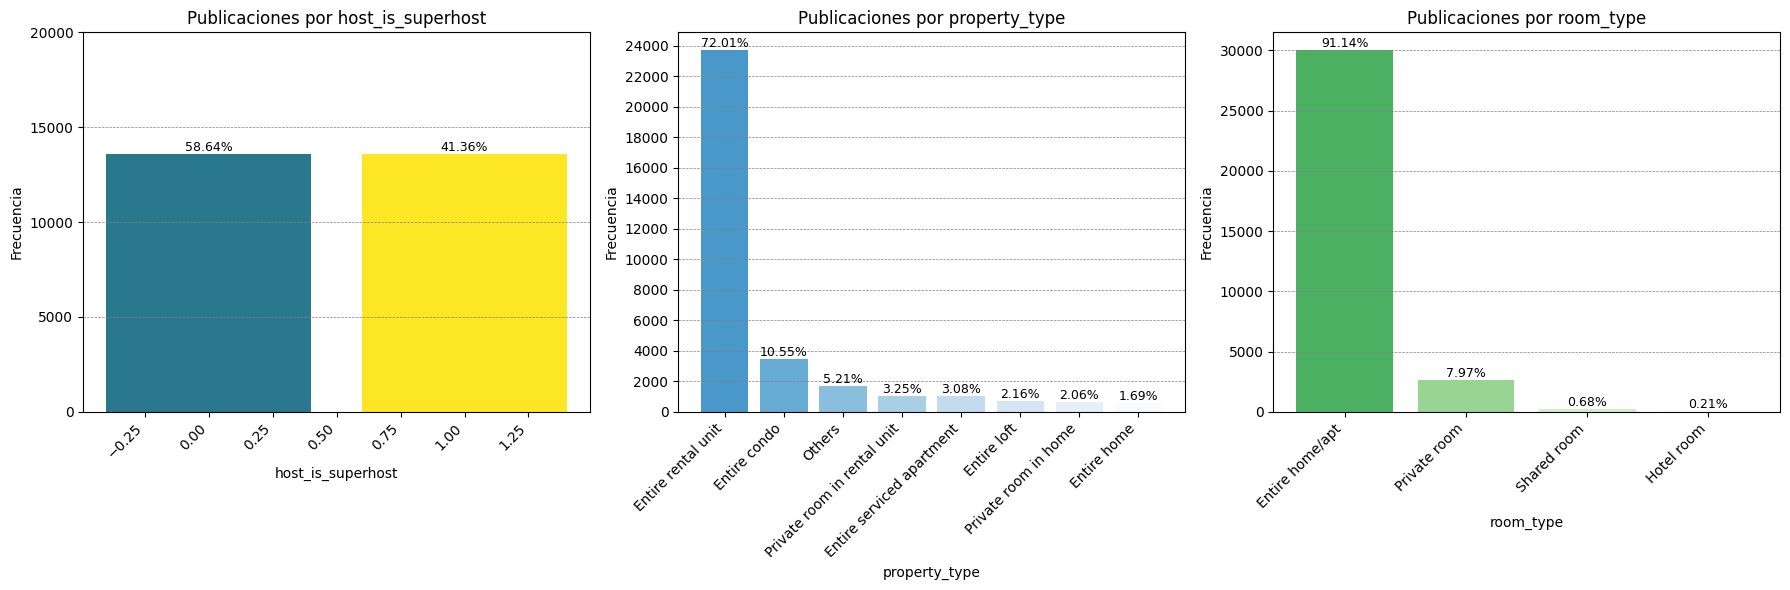

In [14]:
# Plots de superhost | property_type | room_type
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Vamos a graficar todo en un grid
plot_variable_cat(df_train, 'host_is_superhost', ax=axs[0], color_palette='viridis', grid_interval=5000, orientation='vertical', size_font=9)
plot_variable_cat(df_train, 'property_type', ax=axs[1], color_palette='Blues_r', grid_interval=2000, orientation='vertical', size_font=9)
plot_variable_cat(df_train, 'room_type', ax=axs[2], color_palette='Greens_r', grid_interval=5000, orientation='vertical', size_font=9)

plt.tight_layout()
plt.show()

De las gráficas podemos concluir que:
- El 41.36% de los hosts son superhost, lo que significa que un poco menos del 50% de los usuarios tiene buenas puntuaciones como anfitrión por parte de los usuarios que se hospedaron en sus alojamientos. Esto es una característica que mucha gente tiene en cuenta a lo hora de alquilar un hospedaje.
- La mayor parte de los alojamientos publicados son para unidades completas, es decir, alojamientos privados. En menor magnitud se presentan alquiler de habitaciones privadas y/o compartidas y en cuanto a cuartos de hotel, directamente son inexistentes en esta plataforma (es esperable, airbnb es una plataforma más orientada a particulares, para hoteles hay otras más enfocadas a ese rubro e.g. "Booking").
-  Algunas categorías se presentan en 1 alojamiento, por lo que se agrupo en "others".

In [15]:
# Ánalizaremos los datos de los alojamientos según el barrio en el que se encuentran ubicados
prop_barrio = df_train['neighbourhood_cleansed'].value_counts(normalize=True)
print(prop_barrio)

Palermo              0.323547
Recoleta             0.144268
San Nicolas          0.061330
Belgrano             0.054705
Retiro               0.047623
Monserrat            0.045891
Almagro              0.037351
Balvanera            0.035740
Villa Crespo         0.034282
San Telmo            0.027626
Colegiales           0.023158
Nuñez                0.022490
Caballito            0.021274
Chacarita            0.016898
Constitucion         0.012825
Villa Urquiza        0.011944
Puerto Madero        0.010819
Barracas             0.008084
San Cristobal        0.006868
Saavedra             0.006625
Flores               0.004771
Villa Ortuzar        0.003799
Coghlan              0.003708
Villa Del Parque     0.003647
Boca                 0.003434
Boedo                0.003221
Villa Devoto         0.003161
Parque Patricios     0.002674
Parque Chacabuco     0.002249
Parque Chas          0.002067
Villa Pueyrredon     0.001975
Paternal             0.001489
Floresta             0.001398
Villa Sant

Se agruparon todos los barrios en los que la cantidad de alojamientos publicados es menor del 1%

In [16]:
# Armamos una lista de tipos de propiedades que tienen una proporción mayor o igual al 1%
lista_prop_barrio = prop_barrio[prop_barrio >= 0.01].index

# Los que tengan una proporción menor al 1% los agrupamos en una categoría residual "Others" 
df_train['neighbourhood_cleansed'] = df_train['neighbourhood_cleansed'].apply(lambda x: x if x in lista_prop_barrio else 'Others')

# Ahora vemos el resultado
print(df_train['neighbourhood_cleansed'].value_counts(normalize=True))

Palermo          0.323547
Recoleta         0.144268
Others           0.068229
San Nicolas      0.061330
Belgrano         0.054705
Retiro           0.047623
Monserrat        0.045891
Almagro          0.037351
Balvanera        0.035740
Villa Crespo     0.034282
San Telmo        0.027626
Colegiales       0.023158
Nuñez            0.022490
Caballito        0.021274
Chacarita        0.016898
Constitucion     0.012825
Villa Urquiza    0.011944
Puerto Madero    0.010819
Name: neighbourhood_cleansed, dtype: float64


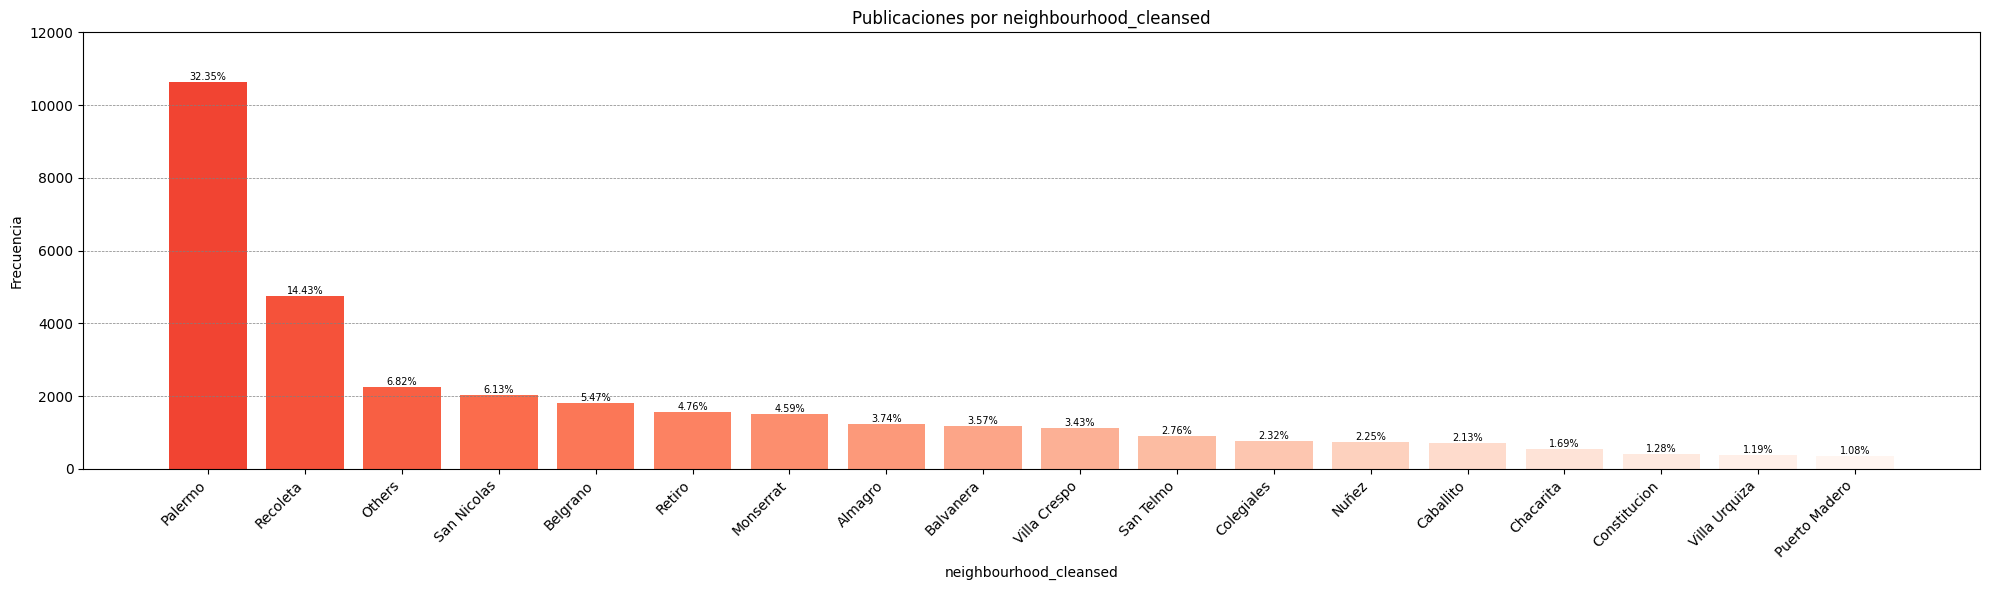

In [17]:
# Gráfico de barrio
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Vamos a graficar todo en un grid
plot_variable_cat(df_train, column_name="neighbourhood_cleansed", ax=ax, grid_interval=2000, size_font=7)

plt.tight_layout()
plt.show()

* Hay una mayor oferta en algunos de los barrios más populares de CABA. Palermo, Recoleta, San nicolas y Belgrano agrupan mas del 50% de publicaciones de alojamientos. Son zonas contiguas (incluyendo a Retiro también), que forman el mayor bloque de oferta de alojamientos (y demanda de turistas).

##### **Variables numéricas:** 

- **bathrooms** (float64): cantidad de baños.
- **bedrooms** (int64): cantidad de cuartos del alojamiento.
- **beds** (int64): cantidad de camas.
- **number_of_reviews** (int64): Cantidad de reviews que recibió el alojamiento.
- **review_scores_rating** (float64): Puntuación del alojamiento.
- **latitude** (float64): Coordenada geográfica/Latitud.
- **longitude** (float64): Coordenada geográfica/Longitud.
- **availability_30** (int64): Disponibilidad a 30 días 
- **availability_60** (int64): Disponibilidad a 60 días 
- **availability_90** (int64): Disponibilidad a 90 días 


In [18]:
def plot_variable_num(df, column_name, ax, color_palette='Blues', bins=10, grid_interval=None, text_size=10):
    # Hay un tema con los ticks que genera warnings, así que se suprimen
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')  # Suprime warnings

        # Determina el tipo de variable
        col_type = df[column_name].dtype

        if col_type == 'float64':
            # Si es una variable numérica continua, genera un histograma
            ax.hist(df[column_name].dropna(), bins=bins, color=plt.cm.get_cmap(color_palette)(0.6))
            ax.set_ylabel('Frecuencia')
            ax.set_xlabel(column_name)
            ax.set_title(f'Histograma de {column_name}')
            ax.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)

        elif col_type == 'int64':
            # Si es una variable numérica discreta, genera un gráfico de barras
            value_counts = df[column_name].value_counts()
            value_order = value_counts.index
            percentages = (value_counts / value_counts.sum()) * 100

            cmap = plt.colormaps[color_palette]
            colors = cmap(np.linspace(0.4, 1, len(value_order)))

            bars = ax.bar(value_order, value_counts[value_order], color=colors)
            ax.set_ylabel('Frecuencia')
            ax.set_xlabel(column_name)
            if grid_interval:
                ax.set_yticks(np.arange(0, max(value_counts) + grid_interval, grid_interval))
            ax.grid(axis='y', color='grey', linestyle='--', linewidth=0.5)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

            # Añadir los porcentajes a las barras
            for bar, percentage in zip(bars, percentages):
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                        f'{percentage:.2f}%', va='bottom', ha='center', fontsize=text_size)

            ax.set_title(f'Frecuencia de {column_name}')

        else:
            raise ValueError(f'El tipo de dato de la columna {column_name} no es numérico.')

In [19]:
df_train[['bathrooms','bedrooms','beds','number_of_reviews','review_scores_rating','latitude','longitude','availability_30','availability_60','availability_90']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32904 entries, 5078 to 15795
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             30525 non-null  float64
 1   bedrooms              32396 non-null  float64
 2   beds                  30516 non-null  float64
 3   number_of_reviews     32904 non-null  int64  
 4   review_scores_rating  26727 non-null  float64
 5   latitude              32904 non-null  float64
 6   longitude             32904 non-null  float64
 7   availability_30       32904 non-null  int64  
 8   availability_60       32904 non-null  int64  
 9   availability_90       32904 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


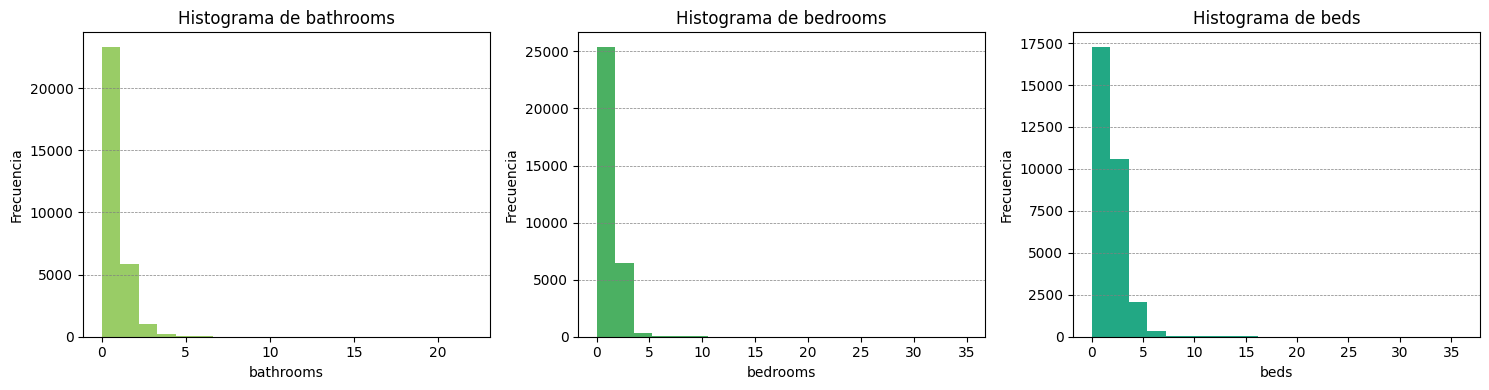

In [20]:
# Se dibujan todos los histogramas de las variables numéricas, vamos a separar temas por filas

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Habitaciones / tamaño del alojamiento
plot_variable_num(df_train, 'bathrooms', ax=axs[0], color_palette='summer', bins=20, text_size=8)
plot_variable_num(df_train, 'bedrooms', ax=axs[1], color_palette='Greens', bins=20, text_size=8)
plot_variable_num(df_train, 'beds', ax=axs[2], color_palette='viridis', bins=20, text_size=8)

plt.tight_layout()
plt.show()

* La mayoria de los alojamientos tienen 1 o hasta 2 baños.
* Se observan que son unidades básicas principalmente, esto se puede interpretar por cantidad mínima de ambientes que se presentan. En el caso de las habitaciones, la gran mayoria tiene entre 1-2 habitaciones.
* Se presentan una cantidad mayor de camas que de habitaciones, por lo que se ve que se intenta adaptar estos alojamientos "básicos"
 para alojar mayor cantidad de personas.
* Para valores por arriba de los típicos en el todos los casos se puede dar en alojamientos que sean del tipo hostel u hoteles.

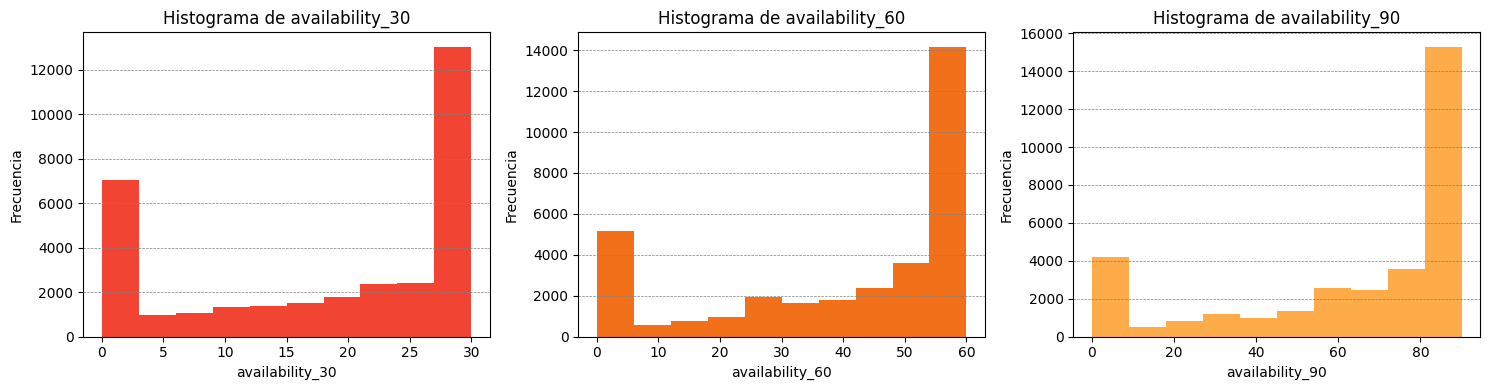

In [21]:
# En el caso de la disponibilidad, si bien está en enteros (son días), se pasan a variables continuas para mejorar la visualización.

df_train['availability_30'] = df_train['availability_30'].astype('float')
df_train['availability_60'] = df_train['availability_60'].astype('float')
df_train['availability_90'] = df_train['availability_90'].astype('float')

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Disponibilidad del alojamiento
plot_variable_num(df_train, 'availability_30', ax=axs[0], color_palette='Reds', bins=10, text_size=8)
plot_variable_num(df_train, 'availability_60', ax=axs[1], color_palette='Oranges', bins=10, text_size=8)
plot_variable_num(df_train, 'availability_90', ax=axs[2], color_palette='YlOrRd_r', bins=10, text_size=8)

plt.tight_layout()
plt.show()

* La disponibilidad hace referencia a la cantidad de días que esta disponible un alojamiento en un rango de 30, 60 y 90 días.
* Se presentan distribuciones bimodales. Lo anterior se evidencia en que hay algunos alojamientos que estan totalmente disponibles en 30, 60 o 90 días, como así alojamientos que estan ocupados por todo ese período (x = 0).

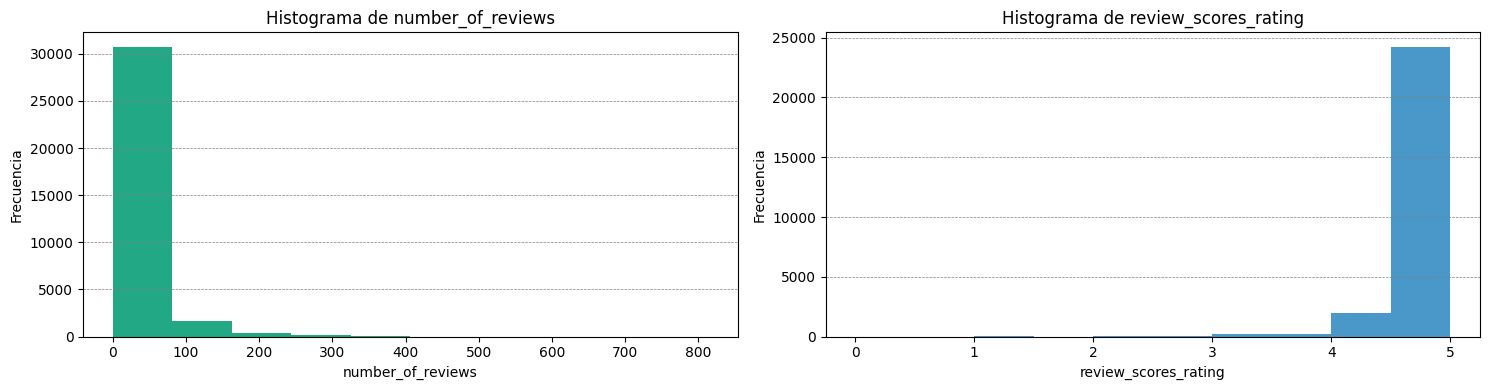

In [22]:
# Reviews | Cantidad y puntuación

df_train['number_of_reviews'] = df_train['number_of_reviews'].astype('float')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

plot_variable_num(df_train, 'number_of_reviews', ax=axs[0], color_palette='viridis', bins=10, text_size=8)
plot_variable_num(df_train, 'review_scores_rating', ax=axs[1], color_palette='Blues', bins=10, text_size=8)


plt.tight_layout()
plt.show()

* Se observa que la mayoría de los alojamientos tienen pocas reseñas, de 0 a 100 en su mayoría.
* Existen algunos alojamientos más populares que llegan a tener 400 reseñas pero son muy pocos.
* La mayoria de las reseñas dejadas por los inquilinos son positivas. Esto es un *estándar* actualmente, tener una puntuación baja implica una baja en la demanda del alojamiento.

#### 2.6 Análisis de variable de Salida: Precio

En este caso sería mejor utilizar el logaritmo de los precios, dado que tienen valores muy bajos / altos, por lo que se agrega al dataset una variable más (log_price) y poder manejar de mejor forma los valores atípicos. También nos sirve para comparar precios entre categorías.

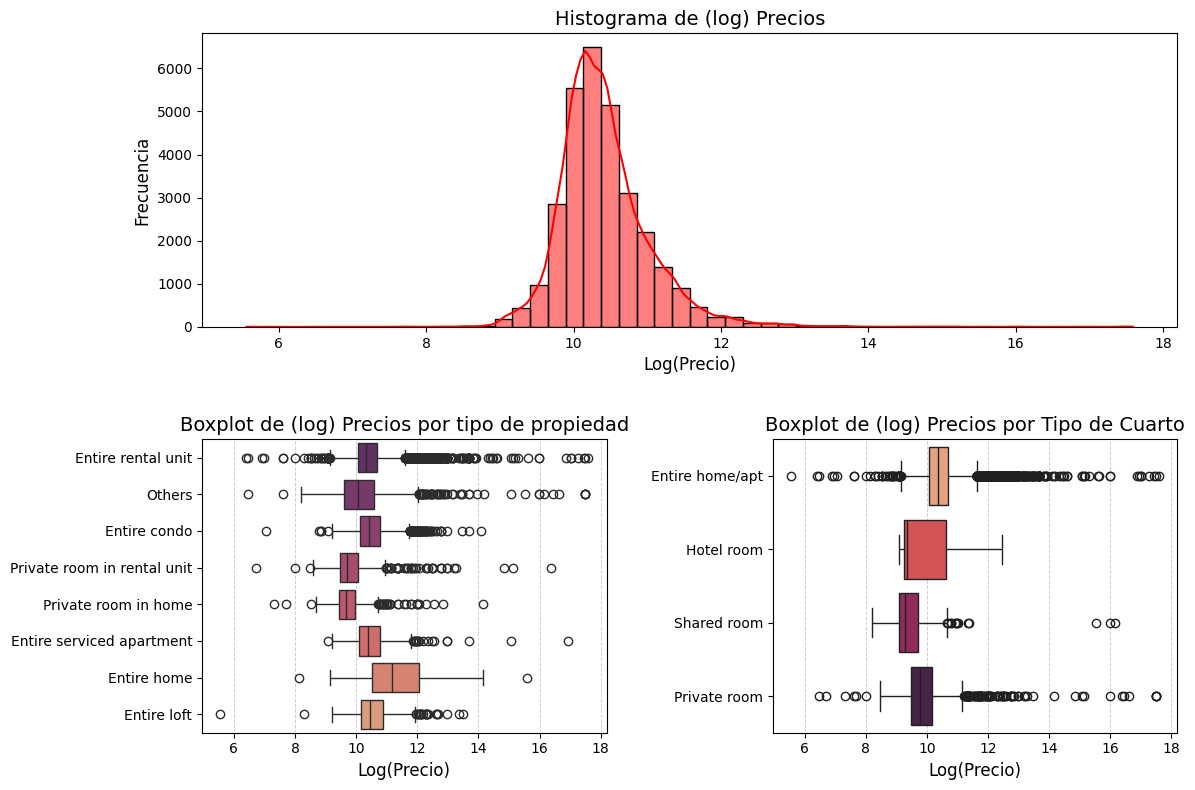

In [23]:
# Histograma para ver como están distribuidos los precios de los alquileres

df_train['log_price'] = np.log(df_train['price'])

# Vamos a usar un objeto de matplotlib para poner los dos graficos en uno
fig = plt.figure(figsize=(12, 8))

# Histograma de precios ocupando las posiciones (0,0) y (0,1)
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
sns.histplot(x=df_train['log_price'], bins=50, color='red', kde=True, ax=ax1)
ax1.set_title('Histograma de (log) Precios', fontsize=14)
ax1.set_xlabel('Log(Precio)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.grid(False)

# Boxplot de precios por tipo de propiedad en (1,0)
ax2 = plt.subplot2grid((2, 2), (1, 0))
sns.boxplot(data=df_train, x='log_price', y='property_type', hue='property_type', palette='flare_r', ax=ax2)
ax2.set_title('Boxplot de (log) Precios por tipo de propiedad', fontsize=14)
ax2.set_xlabel('Log(Precio)', fontsize=12)
ax2.set_ylabel('')
ax2.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Boxplot de precios por tipo de cuarto en (1,1)
ax3 = plt.subplot2grid((2, 2), (1, 1))
sns.boxplot(data=df_train, x='log_price', y='room_type', hue='room_type', palette='rocket_r', ax=ax3)
ax3.set_title('Boxplot de (log) Precios por Tipo de Cuarto', fontsize=14)
ax3.set_xlabel('Log(Precio)', fontsize=12)
ax3.set_ylabel('')
ax3.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.show()

Algunas puntos que se pueden observar en el gráfico:
- Parece ser que la transformación logarítmica es efectiva para normalizar los datos de los precios (queda una distribución bastante simétrica).
- La variable log_price cubre un rango amplio (6-18), lo que indica que los precios varías en órdenes de magnitud (de muy bajo a hasta muy altos).
- Los alojamientos del tipo "Entire home" y las categorías de tipo de cuarto "Entire home/apt" y "Hotel room" tienden a tener precios más altos, lo cual es esperable dado que por lo general más espacio y comodidad.
- Las "Private rooms" y "Shared rooms" tienden a tener precios más bajos, reflejando su naturaleza más económica o compartida.
- Los boxplots (tanto de tipo de propiedad como de cuarto) muestran una cantidad significativa de outliers en varias categorías, lo cual puede estar indicando presencia de alojamientos que están muy por fuera de la norma en cuanto a precio. Esto puede estar relacionado con propiedades de lujo, propiedades en ubicaciones demandadas, entre otros.

## 3. Limpieza y preparación de datos / ingeniería de features

#### 3.1 Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

In [24]:
# Se crea una función para ver valores faltantes de atributos que componen el dataset

def miss_data(df_train, col):
    
    # Total de filas del df original
    total_filas = len(df_train)
    
    # Lista para ir agregando los resultados
    resultados = []

    for var in col:
        valores_faltantes = df_train[var].isna().sum()
        proporcion_faltantes = valores_faltantes/total_filas
        resultados.append({
            'Columna': var,
            'Total_Filas': total_filas,
            'Valores_Faltantes': valores_faltantes,
            'Prop_faltantes': proporcion_faltantes
        })
    
    resultado_df_train = pd.DataFrame(resultados)
    
    return resultado_df_train

In [25]:
# Vamos a ver que atributos tienen datos faltantes, la cantidad de los mismos y la proporción con respecto al total de datos
df_train_faltantes = miss_data(df_train, list(df_train.columns)).sort_values('Prop_faltantes', ascending=False)

# Nos quedamos solo con aquellas variables que tienen datos faltantes
df_train_faltantes[df_train_faltantes['Prop_faltantes'] > 0]


,Columna,Total_Filas,Valores_Faltantes,Prop_faltantes
10,review_scores_rating,32904,6177,0.187728
7,beds,32904,2388,0.072575
4,bathrooms,32904,2379,0.072301
8,price,32904,2371,0.072058
19,log_price,32904,2371,0.072058
6,bedrooms,32904,508,0.015439
5,bathrooms_text,32904,22,0.000669


#### 3.2 ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría? Ensayar distintas técnicas y analizar los resultados.

Se puede ver que, de acuerdo al total de filas del dataframe, tenemos 32.904 observaciones. Como se observa en la tabla anterior, algunos atributos presentan datos faltantes (con su peso relativo respecto a la cantidad de datos) que pueden darse por distintas causas. En principio nos enfocamos en la variable objetivo *"precio"*, que nos interesa poder tenerla como un dato completo, de forma de poder utilizar alguna técnica para poder predecir el precio del alojamiento según sus atributos.

In [26]:
# Parece que los nulos en precios son del scraping anterior, por eso faltan esos datos...
print(f'Fuente de datos:')
print(datos_originales['source'].unique())
datos_originales.groupby('source')['price'].apply(lambda x: x.isnull().sum())

Fuente de datos:
['city scrape' 'previous scrape']


source
city scrape           0
previous scrape    2650
Name: price, dtype: int64

En este caso se puede ver un claro ejemplo de datos faltantes al azar (**MAR**), dado que la falta de datos se puede explicar por el valor de otras columnas (en este caso por *source*). No se tiene mayor información sobre *source*, pero se puede inferir que para la obtención de datos del dataset, se tomaron 2 fuentes distintas (o en defecto, se aplicaron 2 técnicas de *scraping*), en la que la más reciente (*city scrape*) pudo acceder a datos que la anterior (*previous scrape*) no traía.

Otra variable que presenta datos faltantes al azar, es el rating (*review_scores_rating*), que se podría entender fundamental a la hora de setear el precio del alojamiento (i.e. "lugares mejores puntuados tendrían precios más elevados"). En este caso también se presentan datos faltantes al azar, ya que la falta de puntuaciones responde simplemente a que esos alojamientos aún no tienen *reviews*. Si observamos la cantidad de reviews (*number_of_reviews*), vemos que hay 6.177 valores con 0 como cantidad de puntuaciones, lo que coincide con la cantidad de valores faltantes de la puntuación. Esto se podría entender cómo propiedades nuevas en la plataforma y que si bien están ofertadas, aún no hubo demanda por ellas.

In [27]:
# Cantidad de alojamientos sin puntuación
print(f" Cantidad de alojamientos sin reviews: { sum(df_train['number_of_reviews'] == 0)}")

# Vamos a asegurarnos que los que tienen NAN en puntuación, son efectivamente los que tienen cantidad 0 de reviews
print(f" Cantidad de los anteriores con NAN en rating: {df_train[df_train['number_of_reviews'] == 0]['review_scores_rating'].isna().sum()}")

 Cantidad de alojamientos sin reviews: 6177
 Cantidad de los anteriores con NAN en rating: 6177


In [28]:
# Así que imputamos "0" en aquellos valores faltantes de review_scores_rating
df_train['review_scores_rating'].fillna(0, inplace=True)

Otras variables con datos faltantes que podrían incidir en el precio, son la cantidad de ambientes que puede tener el alojamiento (i.e. *"a mayor cantidad de ambientes, más elevado el precio"*). En este dataset, se tiene información de 2 en particular que parecen relevantes: el número de habitaciones (*bedrooms*) y la cantidad de baños (*bathrooms*). En ambos no se distingue un patrón alguno del faltante de datos (como se veía anteriormente en *price-source*), por lo que pueden ser faltantes completamente por azar (**MCAR**).

Mientras que en la variable *bathrooms* faltan algunos valores (2.379 filas), en la variable *bathrooms_text* se observa que la cantidad de baños está casi completa (tiene 9 filas con datos faltantes), solo que están como una etiqueta, en formato texto (e.g. *1 bath*). Haciendo una transformación de esta última variable, podríamos completar los datos faltantes de *bathrooms*. Otro factor a considerar es que en el dataset se presentan cantidades de baños decimales (e.g. 1.5), lo cual en principio parece incorrecto. Explorando las publicaciones se puede detectar que lo que se considera "medio baño" puede ser por varias causas:
- El tamaño
- Baños auxiliares (*de tocador*)
- Baños compartidos

A los efectos del análisis se determinan estos *medios baños* como enteros (porque en definitiva también lo son), así que se redondearán.

In [29]:
# Categorías que presenta la variable bathrooms_text
df_train['bathrooms_text'].unique()

array(['1 bath', '0 baths', '6 baths', '1.5 baths', '2 baths',
       '1 shared bath', '1 private bath', '3 shared baths', '2.5 baths',
       '3.5 baths', '3 baths', '1.5 shared baths', '2 shared baths',
       '4 shared baths', '2.5 shared baths', '5 baths', '4 baths',
       '13 baths', 'Half-bath', nan, '4.5 baths', '5.5 baths',
       '6.5 shared baths', '20 baths', '7 baths', '8.5 baths', '9 baths',
       'Shared half-bath', '0 shared baths', '6 shared baths',
       '7 shared baths', '6.5 baths', '8 baths', '5 shared baths',
       '3.5 shared baths', '7.5 shared baths', '7.5 baths',
       'Private half-bath', '5.5 shared baths', '9 shared baths',
       '22 baths', '8 shared baths', '10 baths', '4.5 shared baths',
       '12.5 baths', '9.5 baths', '15 baths', '8.5 shared baths',
       '16 baths'], dtype=object)

In [30]:
# Se hacen las transformaciones necesarias para pasar a formato numérico *bathrooms_text* 

df_train['bathrooms_text'].replace("Half-bath",1,inplace=True)
df_train['bathrooms_text'].replace("Private half-bath",1,inplace=True)
df_train['bathrooms_text'].replace("Shared half-bath",1,inplace=True)

df_train['bathrooms_text'] = df_train['bathrooms_text'].str.replace(' shared baths','',regex=True).str.replace(' shared bath','',regex=True).str.replace(' private bath','',regex=True)
df_train['bathrooms_text'] = df_train['bathrooms_text'].str.replace(' baths','',regex=True).str.replace(' bath','',regex=True)

df_train['bathrooms_text'] = df_train['bathrooms_text'].astype('float').round(0)

# bathrooms si bien tiene valores numéricos, también se presentaba con tupo objeto
df_train['bathrooms'] = df_train['bathrooms'].astype('float').round(0)

In [31]:
# Categorías que presenta la variable bathrooms_text luego de transformación
df_train['bathrooms_text'].unique()

array([ 1.,  0.,  6.,  2.,  3.,  4.,  5., 13., nan, 20.,  7.,  8.,  9.,
       22., 10., 12., 15., 16.])

In [32]:
# Ahora usamos esto para sustituir valores faltantes de bathrooms
print(f"Cantidad de valores faltantes en bathrooms antes de transformación: {df_train['bathrooms'].isna().sum()}")
df_train['bathrooms'] = df_train.apply(lambda row: row['bathrooms_text'] if pd.isna(row['bathrooms']) else row['bathrooms'], axis=1)
print(f"Cantidad de valores faltantes en bathrooms después de transformación: {df_train['bathrooms'].isna().sum()}")

Cantidad de valores faltantes en bathrooms antes de transformación: 2379
Cantidad de valores faltantes en bathrooms después de transformación: 21


Así que logramos limpiar lo más posible esta variable. En cuanto a cantidad de cuartos, como se comentaba anteriormente, no hay un patrón claro, pero los valores faltantes (508 filas) representan en el entorno del 1.6% del total de datos, por lo que seguramente podríamos desestimar estas observaciones para nuestro análisis. Para imputar la variable *beds* podríamos hacer uso del valor medio en esa variable para distintas combinaciones de bedrooms y baño (no podría dar un indicio de la cantidad de camas).


In [33]:
# Se calcula la mediana de beds para cada combinación bathrooms/bedroom
median_beds = df_train.groupby(['bedrooms', 'bathrooms'])['beds'].transform('median')

# Luego, imputamos los valores faltantes en "beds" usando la mediana calculada
df_train['beds'] = df_train.apply(lambda row: median_beds[row.name] if pd.isna(row['beds']) else row['beds'], axis=1)

# Quedan algunos, pero logramos recuperar varios datos
print(df_train['beds'].isna().sum())

505





Pasemos a imputar los datos faltantes en el precio. El barrio es algo determinante en el alquiler de los alojamientos, por lo general. Se tratará de situar los alojamientos en un mapa, para ver si hay un patrón claro.

##### Visualización de mapa

In [34]:
from ipyleaflet import Map, Marker, Popup
from ipywidgets import HTML

In [ ]:
# Mapa centrado de los datos (a través de la mediana)
center_map = [df_train['latitude'].median(), df_train['longitude'].median()]
df_train_map = folium.Map(location=center_map, zoom_start=12)

# Colormap para los precios 
norm = mpl.colors.Normalize(vmin=df_train['log_price'].min(), vmax=df_train['log_price'].max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='YlOrRd')  

# Función para escalar los valores de 'price' a radios y asignar tamaño de acuerdo al precio
def scale_radius(price, min_price, max_price, min_radius, max_radius):
    scaled_radius = ((price - min_price) / (max_price - min_price)) * (max_radius - min_radius) + min_radius
    return scaled_radius

# Valores mínimos y máximos de precio
min_price = df_train['price'].min()
max_price = df_train['price'].max()

# Valores mínimos y máximos del radio
min_radius = 5
max_radius = 20

# Función para añadir puntos al mapa
def add_circle_marker(row):
    color = mpl.colors.to_hex(cmap.to_rgba(row['log_price']))
    radius = scale_radius(row['log_price'], min_price, max_price, min_radius, max_radius)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,  # Radio del círculo
        color='black',
        weight=1,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(f"<b>{row['name']} <br> Rating: {row['review_scores_rating']} | Reviews ({row['number_of_reviews']}) </b> <br> "
                           f"Barrio: {row['neighbourhood_cleansed']} <br> Host: {row['host_name']}  <br> Precio: ${row['price']}",
                           min_width=150, max_width=200)
    ).add_to(df_train_map)

# Se aplica la función a cada fila del DataFrame
df_train.apply(lambda row: add_circle_marker(row), axis=1)

# Plugins - Minimapa
minimap = plugins.MiniMap()
df_train_map.add_child(minimap)
df_train_map

# Visualización del mapa
df_train_map



En el mapa anterior no se pueden identificar claramente las zonas más baratas/caras para alquilar. Quizás lo mejor es segmentar por barrio y tomando una medida de centralización de los precios como puede ser la mediana (más robusta).

In [ ]:
# Mapa centrado de los datos (a través de la mediana)
center_map = [df_train['latitude'].median(), df_train['longitude'].median()]
df_train_map = folium.Map(location=center_map, zoom_start=12)

# Función para calcular la mediana de precios por barrio
def medianprice_neighbourhood(df_train):
    median_prices = df_train.groupby('neighbourhood_cleansed')['price'].median().reset_index()
    median_prices = median_prices.rename(columns={'price': 'median_price'})
    return df_train.merge(median_prices, on='neighbourhood_cleansed')

# Aplicar la función a los datos
df_train = medianprice_neighbourhood(df_train)

# Colormap para los precios 
norm = mpl.colors.Normalize(vmin=df_train['median_price'].min(), vmax=df_train['median_price'].max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='YlOrRd')  

# Función para escalar los valores de 'price' a radios y asignar tamaño de acuerdo al precio
def scale_radius(price, min_price, max_price, min_radius, max_radius):
    scaled_radius = ((price - min_price) / (max_price - min_price)) * (max_radius - min_radius) + min_radius
    return scaled_radius

# Valores mínimos y máximos de precio
min_price = df_train['price'].min()
max_price = df_train['price'].max()

# Valores mínimos y máximos del radio
min_radius = 5
max_radius = 20

# Función para añadir puntos al mapa
def add_circle_marker(row):
    color = mpl.colors.to_hex(cmap.to_rgba(row['median_price']))
    radius = scale_radius(row['log_price'], min_price, max_price, min_radius, max_radius)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,  # Radio del círculo
        color='black',
        weight=1,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(f"<b>{row['name']} <br> Rating: {row['review_scores_rating']} | Reviews ({row['number_of_reviews']}) </b> <br> "
                           f"Barrio: {row['neighbourhood_cleansed']} <br> Host: {row['host_name']}  <br> Precio: ${row['price']}",
                           min_width=150, max_width=200),
    ).add_to(df_train_map)

# Se aplica la función a cada fila del DataFrame
df_train.apply(lambda row: add_circle_marker(row), axis=1)

# Plugins - Minimapa
minimap = plugins.MiniMap()
df_train_map.add_child(minimap)
df_train_map

# Visualización del mapa
df_train_map



Ahora si se pueden detectar zonas de renta donde el precio parece ser más elevado, siguiendo el patrón que cuanto más cercano a la costa, más aumenta la renta temporal de estas propiedades. Esto también se puede ver en la siguiente gráfica.

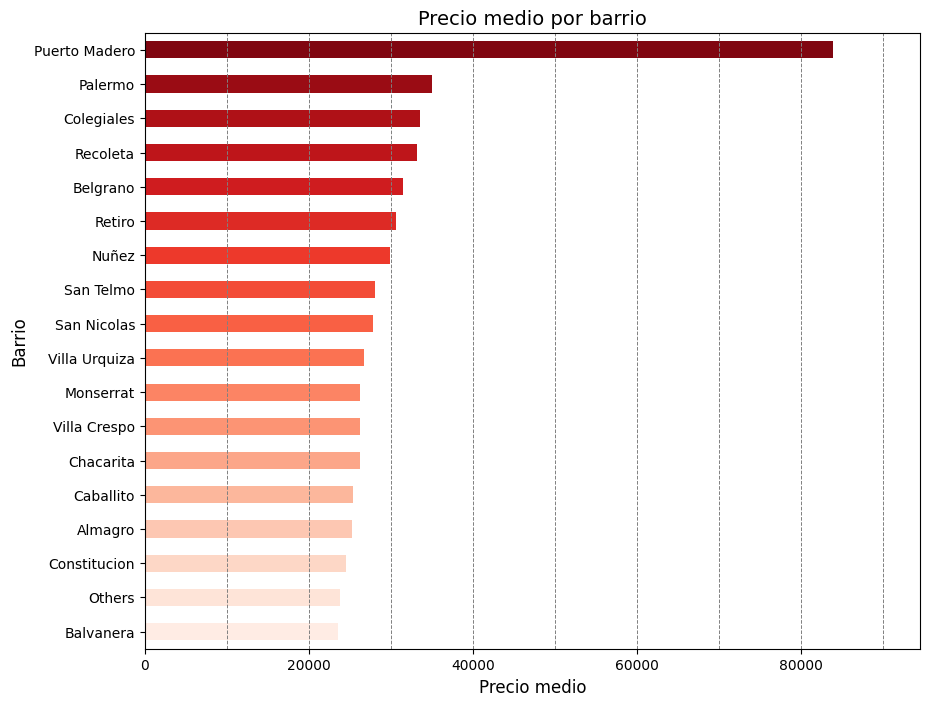

In [37]:
# Ordenamos por valor medio para ver del precio más alto al mas bajo
df_train_sorted = df_train.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=True)

colors = sns.color_palette("Reds", len(df_train_sorted))

fig, ax = plt.subplots(figsize=(10, 8))
df_train_sorted.plot(kind='barh', ax=ax, color=colors)

# Agregamos líneas para ver mejor las diferencias
for x in range(10000, int(df_train_sorted.max()) + 10000, 10000):
    ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.7)


plt.xlabel('Precio medio', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.title('Precio medio por barrio', fontsize=14)

plt.show()

Así que para imputar los datos faltantes de precios, nos basaremos en una imputación simple a través de la mediana de cada barrio. Si bien esto puede distorsionar la distribución original, son relativamente pocos datos los que habría que imputar.

In [38]:
# Vamos a dejar un flag para saber que datos imputamos
df_train['miss_price'] = df_train['price'].isna()

In [39]:
# Se calculan las medianas para cada barrio
medianas_por_neighbourhood = df_train.groupby('neighbourhood_cleansed')['price'].median()

# Se crea una función para imputar la mediana del precio por barrio
def imputar_mediana(row):
    if pd.isna(row['price']):
        return medianas_por_neighbourhood[row['neighbourhood_cleansed']]
    else:
        return row['price']

# Aplicamos la función a cada fila 
df_train['price'] = df_train.apply(imputar_mediana, axis=1)

# Ahora que tenemos todos los precios, aplicamos nuevamente el logaritmo:
df_train['log_price'] = np.log(df_train['price'])

In [40]:
miss_data(df_train, list(df_train.columns)).sort_values('Prop_faltantes', ascending=False)

,Columna,Total_Filas,Valores_Faltantes,Prop_faltantes
6,bedrooms,32904,508,0.015439
7,beds,32904,505,0.015348
5,bathrooms_text,32904,86,0.002614
4,bathrooms,32904,21,0.000638
0,name,32904,0,0.000000
13,property_type,32904,0,0.000000
20,median_price,32904,0,0.000000
19,log_price,32904,0,0.000000
18,amenities,32904,0,0.000000
17,availability_90,32904,0,0.000000


In [41]:
# Se saca lo anterior
df_train = df_train[df_train['neighbourhood_cleansed'] != "Villa Soldati"]
df_train.shape

# Lo que no pudimos recuperar, lo terminamos sacando
df_train = df_train.dropna()

#### 3.3 En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico.

En nuestro caso sería interesante usar:
 - Target Encoding: Ya que nos serviría codificar el barrio_cleansed en relación con la media del target.
 - One-Hot Encoding: Es más simple que el target encoding, pero puede también funcionar.

In [42]:
#Probamos con target_encodig:
df_train.columns

Index(['name', 'host_name', 'host_is_superhost', 'neighbourhood_cleansed',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'property_type', 'room_type', 'availability_30', 'availability_60',
       'availability_90', 'amenities', 'log_price', 'median_price',
       'miss_price'],
      dtype='object')

In [43]:
categorical_column = 'neighbourhood_cleansed'
target_column = 'log_price'

# Calculamos la media del target para cada valor único en la columna categórica
encoding_map = df_train.groupby(categorical_column)[target_column].mean()

# Aplicamos el target encoding, sustituyendo los valores originales por la media del target
df_train[f'{categorical_column}_target_enc'] = df_train[categorical_column].map(encoding_map)

# Verificamos los resultados
print(df_train[[categorical_column, f'{categorical_column}_target_enc']].head())

  neighbourhood_cleansed  neighbourhood_cleansed_target_enc
0              San Telmo                          10.350501
1              San Telmo                          10.350501
2              San Telmo                          10.350501
3              San Telmo                          10.350501
4              San Telmo                          10.350501


<Axes: xlabel='neighbourhood_cleansed_target_enc', ylabel='log_price'>

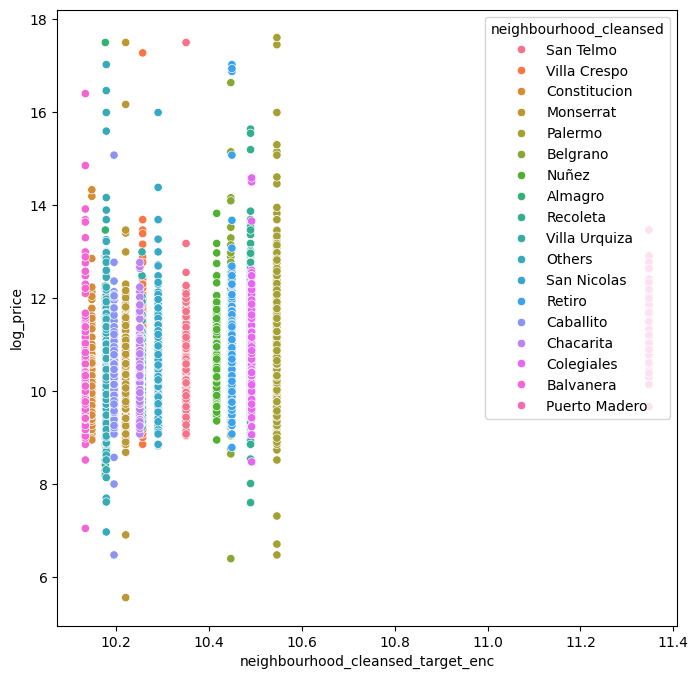

In [44]:
#Ahora veamos la correlacion:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_train, x='neighbourhood_cleansed_target_enc', y='log_price', hue='neighbourhood_cleansed')

En la seccion siguiente veremos la correlacion de esta nueva variable con el target y las otras features.

#### 3.4 ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

Ahora vamos con la correlacion:

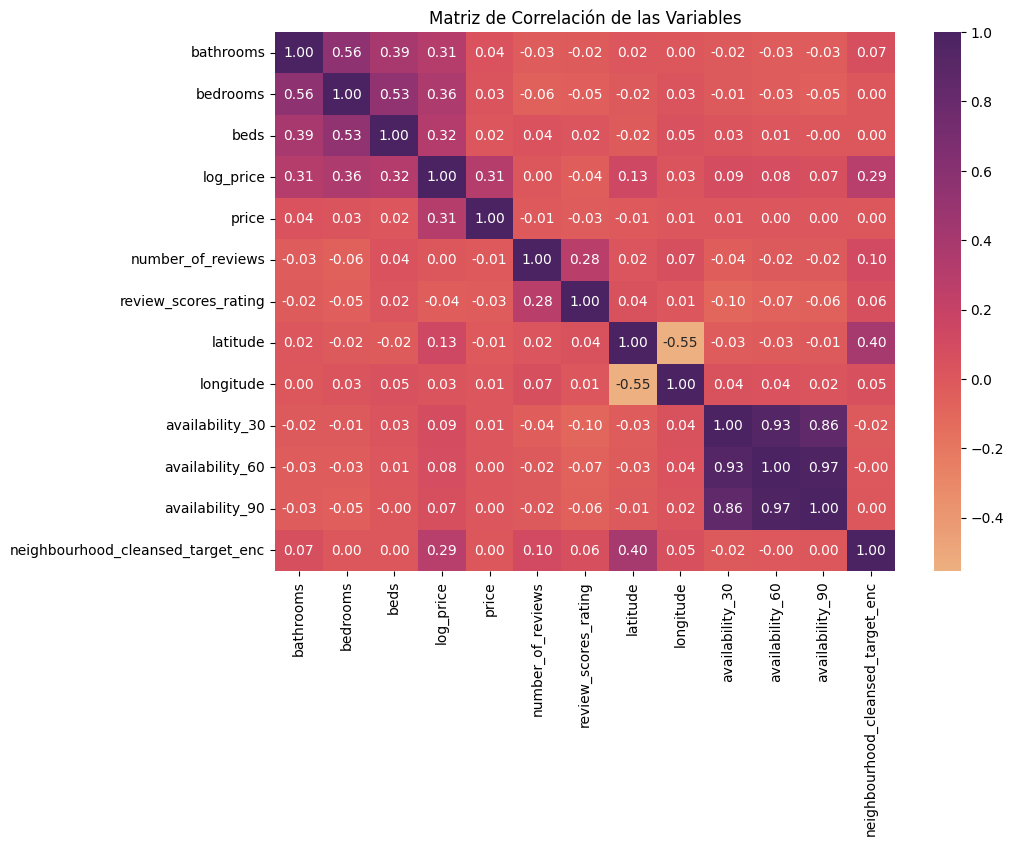

In [45]:
correlation_matrix = df_train[['bathrooms','bedrooms', 'beds', 'log_price','price', 'number_of_reviews', 'review_scores_rating', 
                               'latitude', 'longitude', 'availability_30', 'availability_60', 'availability_90', 'neighbourhood_cleansed_target_enc']].corr()

plt.figure(figsize=(10, 7))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="flare")
plt.title('Matriz de Correlación de las Variables')

plt.show()

In [46]:
df_train[['bathrooms','bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude', 'availability_30', 
          'availability_60', 'availability_90','neighbourhood_cleansed_target_enc']].corr()

,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,latitude,longitude,availability_30,availability_60,availability_90,neighbourhood_cleansed_target_enc
bathrooms,1.000000,0.558951,0.393800,0.035448,-0.029590,-0.024323,0.015475,0.004548,-0.017850,-0.029367,-0.033896,0.066220
bedrooms,0.558951,1.000000,0.533099,0.026358,-0.056375,-0.051457,-0.018571,0.027884,-0.014155,-0.033697,-0.050701,0.003716
beds,0.393800,0.533099,1.000000,0.016461,0.036855,0.017901,-0.020910,0.049270,0.026777,0.012905,-0.000460,0.001134
price,0.035448,0.026358,0.016461,1.000000,-0.011669,-0.026993,-0.010841,0.009452,0.008531,0.004624,0.004662,0.002764
number_of_reviews,-0.029590,-0.056375,0.036855,-0.011669,1.000000,0.282008,0.021566,0.068113,-0.041048,-0.019633,-0.015525,0.103902
review_scores_rating,-0.024323,-0.051457,0.017901,-0.026993,0.282008,1.000000,0.044992,0.012713,-0.098371,-0.071583,-0.056831,0.059623
latitude,0.015475,-0.018571,-0.020910,-0.010841,0.021566,0.044992,1.000000,-0.553847,-0.033913,-0.025340,-0.013925,0.404163
longitude,0.004548,0.027884,0.049270,0.009452,0.068113,0.012713,-0.553847,1.000000,0.043637,0.038179,0.023156,0.054735
availability_30,-0.017850,-0.014155,0.026777,0.008531,-0.041048,-0.098371,-0.033913,0.043637,1.000000,0.928904,0.859355,-0.015858
availability_60,-0.029367,-0.033697,0.012905,0.004624,-0.019633,-0.071583,-0.025340,0.038179,0.928904,1.000000,0.968124,-0.004340


In [47]:
correlation_matrix['log_price'].sort_values(ascending=False)
#Podemos ver que cantidad de habitaciones, cantidad de camas, cantidad de banhos, la nueva feature que creamos que representa al barrio, 
# y sorpresa, la posicion vertical de la casa tiene una incidencia positiva en el precio

log_price                            1.000000
bedrooms                             0.357023
beds                                 0.318689
price                                0.313115
bathrooms                            0.312677
neighbourhood_cleansed_target_enc    0.289200
latitude                             0.132344
availability_30                      0.086785
availability_60                      0.079051
availability_90                      0.069363
longitude                            0.027572
number_of_reviews                    0.003735
review_scores_rating                -0.042206
Name: log_price, dtype: float64

In [48]:
#Seria interesante ver la incidencia del barrio solo con el log_price, vamos a crear las dummies features para los barrios y ver cual tiene correlacion con el precio:
df_train_encoded = pd.get_dummies(df_train, columns=['neighbourhood_cleansed'], drop_first=True)

# Filtra el DataFrame para incluir solo 'log_price' y las nuevas variables dummies
filtered_df_train = df_train_encoded[['log_price'] + [col for col in df_train_encoded.columns if 'neighbourhood_cleansed_' in col]]

# Calcula la matriz de correlación
correlation_matrix = filtered_df_train.corr()

correlation_with_log_price = correlation_matrix['log_price'].sort_values(ascending=False)
print(correlation_with_log_price)

log_price                               1.000000
neighbourhood_cleansed_target_enc       0.289200
neighbourhood_cleansed_Puerto Madero    0.161231
neighbourhood_cleansed_Palermo          0.151679
neighbourhood_cleansed_Recoleta         0.051759
neighbourhood_cleansed_Colegiales       0.019989
neighbourhood_cleansed_Belgrano         0.013467
neighbourhood_cleansed_Retiro           0.013389
neighbourhood_cleansed_Nuñez            0.000941
neighbourhood_cleansed_San Telmo       -0.017045
neighbourhood_cleansed_Villa Urquiza   -0.028228
neighbourhood_cleansed_Chacarita       -0.034821
neighbourhood_cleansed_Villa Crespo    -0.047927
neighbourhood_cleansed_Constitucion    -0.049258
neighbourhood_cleansed_San Nicolas     -0.051417
neighbourhood_cleansed_Caballito       -0.052582
neighbourhood_cleansed_Monserrat       -0.069183
neighbourhood_cleansed_Balvanera       -0.086991
neighbourhood_cleansed_Others          -0.102943
Name: log_price, dtype: float64


Vemos que Puerto Madero, Palermo y Recoleta tienen una correlacion interesante con el target log_price.

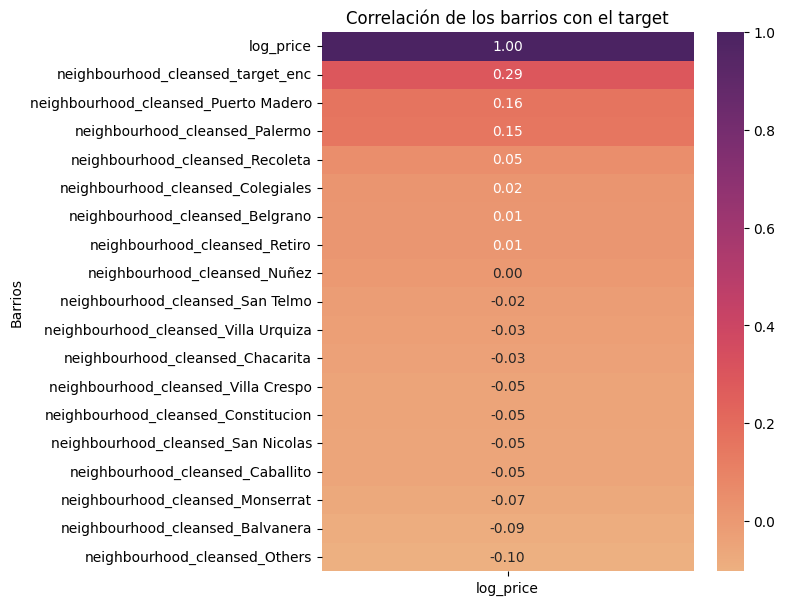

In [49]:
#Hagamos el heatmap de barrios:
# Convertir la Series en un DataFrame
correlation_df = pd.DataFrame(correlation_with_log_price)

# Crear el heatmap
plt.figure(figsize=(6, 7))

sns.heatmap(correlation_df, annot=True, cmap='flare', fmt='.2f')
plt.title('Correlación de los barrios con el target')
plt.ylabel('Barrios')

plt.show()

Por el momento tenemos dos opciones usar las dummie variables que representan cada barrio, o la feature creada en base al barrio usando el target_encoder.

#### 3.5 Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia? Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

Vamos a usar dos métodos:
1) La matriz de correlación antes vista
2) Vamos a armar un random_forest sencillo que nos indique las feature_importance_
Con ambos métodos optaremos por la seleccion de features.

Para ambos casos vamos a manetener la codificacion de los barrios segun el target_encoder, ya que muestra mayor correlacion con el target que cualquier otra dummie de barrio.

In [50]:
df_train.isna().sum()

name                                 0
host_name                            0
host_is_superhost                    0
neighbourhood_cleansed               0
bathrooms                            0
bathrooms_text                       0
bedrooms                             0
beds                                 0
price                                0
number_of_reviews                    0
review_scores_rating                 0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
availability_30                      0
availability_60                      0
availability_90                      0
amenities                            0
log_price                            0
median_price                         0
miss_price                           0
neighbourhood_cleansed_target_enc    0
dtype: int64

In [51]:
#Antes de entrenar vamos a preprocesar los datos:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
selected_columns = ['bathrooms','bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude', 
                                                'availability_30', 'availability_60', 'availability_90', 'neighbourhood_cleansed_target_enc']
df_train_final = df_train[selected_columns]
df_train_final = df_train_final.fillna(0)
x_train_scaled = scaler.fit_transform(df_train_final[selected_columns])

y_train = df_train['log_price']

In [52]:
'''Como vimos anteriormente, podriamos usar la correlacion para quedarnos con las variables: 
bathrooms
bedrooms
beds
latitude
availability_30
Sacariamos las features availability_60, availability_90 -> por tener una altisima correlacion con availability_30
'''

#Sin embargo vamos a correr un random_forest sencillo para obtener las feature_importance y ver cuales features son mas importantes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42, criterion='squared_error', max_depth=6, min_samples_split=6, min_samples_leaf=6)

#Vamos a obtener nuevos set de datos: train y validacion:
x_train_new, x_val_new, y_train_new,  y_val_new = train_test_split(x_train_scaled, y_train, test_size=0.1, random_state=42)

# No vamos a partir el dataset porque vamos a usar este random forest para obtener las feature importances:
model.fit(x_train_new, y_train_new)



RandomForestRegressor(max_depth=6, min_samples_leaf=6, min_samples_split=6,
                      random_state=42)

Mean Squared Error: 0.2323676035558903
                              Feature  Importance
1                            bedrooms    0.468576
0                           bathrooms    0.186593
10  neighbourhood_cleansed_target_enc    0.143457
6                           longitude    0.063012
9                     availability_90    0.041424
2                                beds    0.031229
5                            latitude    0.023691
8                     availability_60    0.014427
7                     availability_30    0.011390
4                review_scores_rating    0.008656
3                   number_of_reviews    0.007546


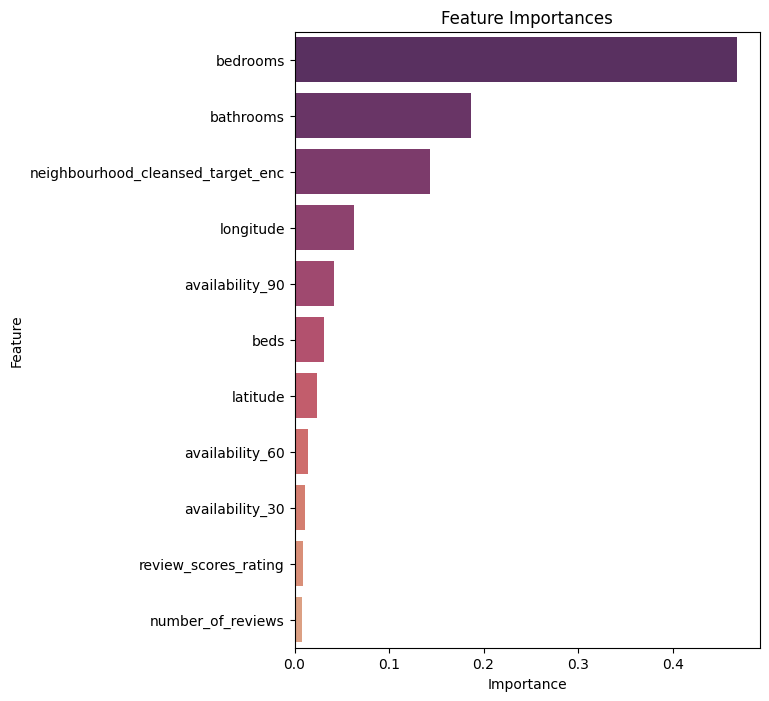

In [53]:
#Ahora comparamos las metricas:
y_pred = model.predict(x_val_new)

# Calculamos el error cuadrático medio
mse = mean_squared_error(y_val_new, y_pred)
print(f'Mean Squared Error: {mse}')

# Obtenemos las feature_importances_
importances = model.feature_importances_

#Vamos a visualizar en un grafico las feature_importances_
feature_importances = pd.DataFrame({'Feature': selected_columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

#Creamos el grafico
plt.figure(figsize=(6, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='flare_r')
plt.title('Feature Importances')
plt.show()



Al final nos quedaremos con las features: banhos, habitaciones, camas, latitud, longitud y disponibilidad_90 son representativas, asi que las eligiremos para el entrenamiento del modelo.

Sacaremos number_reviews, review_scores_rating, availability_60 y availability_30.

## 4. Entrenamiento de modelos (opcional)

In [54]:
#Obtenemos el x_train_final:
final_selected_columns = ['bathrooms','bedrooms', 'beds', 'latitude', 'longitude', 'availability_90', 'neighbourhood_cleansed_target_enc', 'log_price']

df_train_real = df_train[final_selected_columns]
df_train_real = df_train_real.fillna(0)

y_train = df_train_real['log_price']

x_train = df_train_real.drop(columns='log_price')

x_train_scaled = scaler.fit_transform(x_train)


In [55]:
#Al x test debemos crearle la columna neighbourhood_cleansed_target_enc
df_test[f'{categorical_column}_target_enc'] = df_test[categorical_column].map(encoding_map)

df_test['price'] = df_test['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype('float')

# Ajuste en test para que se pueda integrar al modelo - flag
df_test = df_test[df_test['price'] != np.nan]
df_test = df_test[df_test['price'] > 0]
df_test = df_test.fillna(0)

#Tambien pre procesamos a x_test:
x_test_scaled = scaler.transform(df_test[['bathrooms','bedrooms', 'beds', 'latitude', 'longitude', 'availability_90', 'neighbourhood_cleansed_target_enc']])


In [56]:
#Debemos procesar y_test:
df_test = df_test.dropna(subset=['price'])

y_test = df_test['price'].apply(lambda x: np.log(x))

In [57]:
#Creamos un modelo de random forest usando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(random_state=42)

    #Grilla de hyperparametros:
param_grid = {
    'n_estimators': [100],          
    'max_depth': [6],          
    'min_samples_split': [5],          
    'min_samples_leaf': [16]           
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# hacemos la busqueda:
grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 5, 'n_estimators': 100}


In [58]:
#Ahora entrenamos el modelo:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Error real:
print('Error en escala real: ', np.exp(mse))

Mean Squared Error: 0.25116669319654145
Error en escala real:  1.2855243546359043


Fin.